In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"

df = pd.read_csv(URL)


In [3]:
# df.to_csv('Historical_wildfires.csv')
# save to local storage

In [4]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [5]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [6]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [7]:
import datetime as dt

In [8]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [9]:
df.index

RangeIndex(start=0, stop=26406, step=1)

In [10]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

In [11]:
df.tail()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
26401,WA,10/27/2020,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N,2020,10
26402,WA,10/28/2020,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N,2020,10
26403,WA,10/29/2020,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N,2020,10
26404,WA,10/30/2020,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N,2020,10
26405,WA,10/31/2020,107.370851,330.057447,201.625532,92.978723,7.266628,52.803885,47,N,2020,10


TASK 1.1: To understand the change in average estimated fire area over time using pandas to plot the line chart.

Year
2005     92.770501
2006    176.289434
2007    153.112464
2008     99.758968
2009    141.624955
Name: Estimated_fire_area, dtype: float64


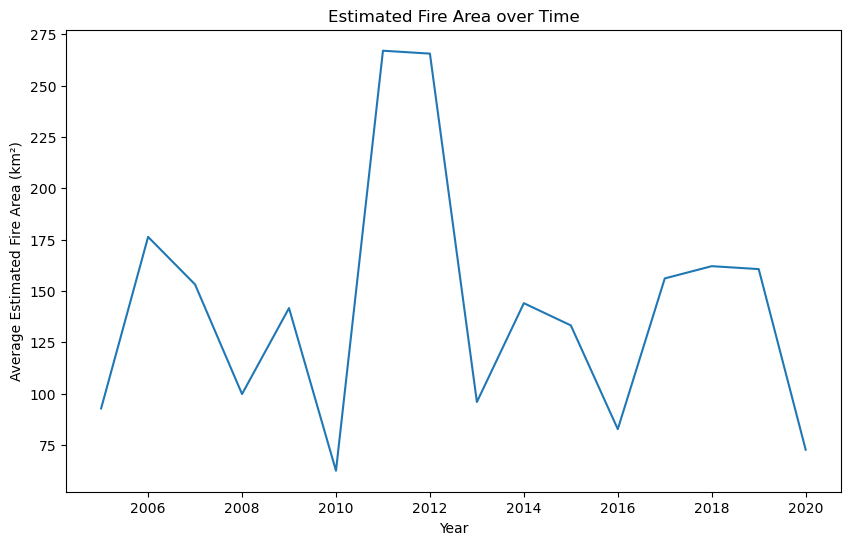

In [12]:
Avg_EFA = df.groupby('Year')['Estimated_fire_area'].mean()
print(Avg_EFA.head())
Avg_EFA.plot.line(figsize = (10,6), )
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

TASK 1.2 To plot the estimated fire area over month

Year  Month
2005  1         70.619908
      2        101.018747
      3         40.901576
      4         69.305388
      5         93.834520
Name: Estimated_fire_area, dtype: float64


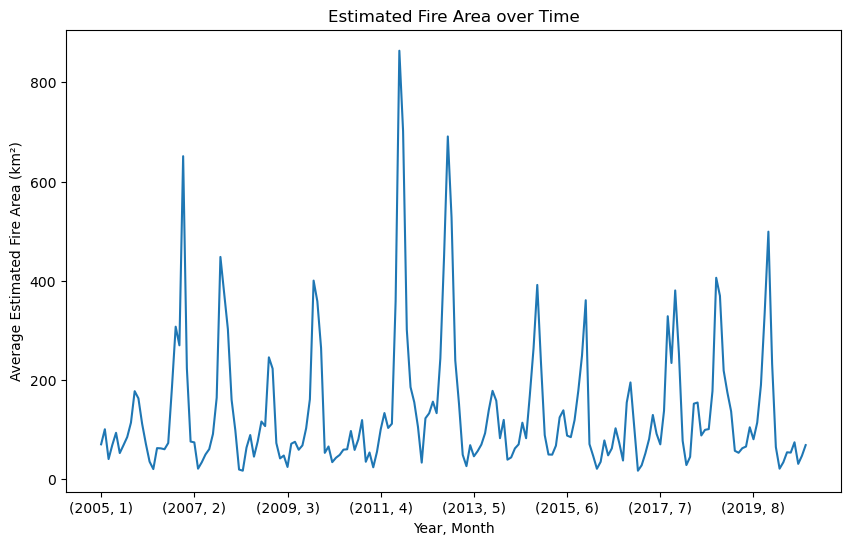

In [13]:
M_EFA = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
print(M_EFA.head())
M_EFA.plot.line(figsize=(10,6))
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

TASK 1.3 Use the functionality of seaborn to develop a barplot, to find the insights on the distribution of mean estimated fire brightness across the regions

In [14]:
print(df['Region'].unique(), df.columns)

['NSW' 'NT' 'QL' 'SA' 'TA' 'VI' 'WA'] Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')


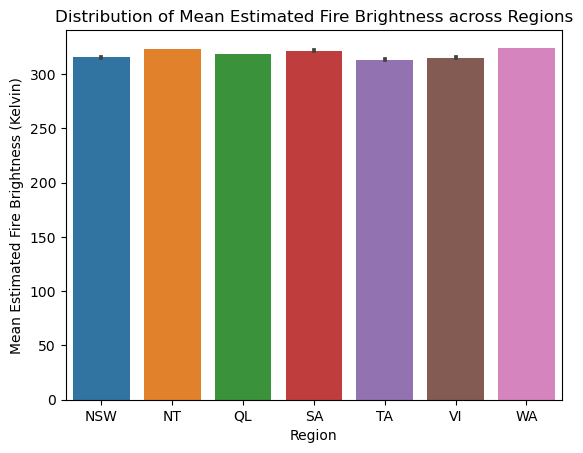

In [15]:
plt.Figure(figsize=(12,6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness', )
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

In [16]:
#creating a horizontal barplot in seaborn
# plt.Figure(figsize=(12,6))
# sns.barplot(data=df, y='Region', x='Mean_estimated_fire_brightness', orient= 'h')
# plt.ylabel('Region')
# plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
# plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
# plt.show()


TASK 1.4 Develop a pie chart and find the portion of count of pixels for presumed vegetation fires vary across regions

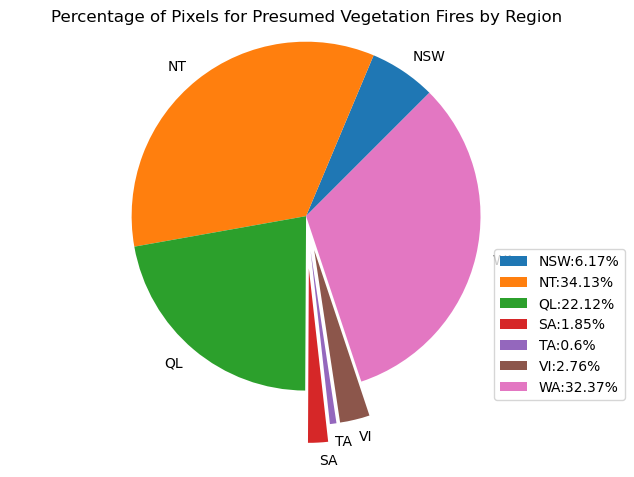

In [17]:
explode_list = (0,0,0,0.3,0.2,0.2,0)

REG_C = df.groupby('Region')['Count'].sum()
plt.Figure(figsize=(12,6))
REG_C.head()
plt.pie(REG_C, labels=REG_C.index, 
               pctdistance = 1.12,
                startangle = 45,
                explode =explode_list
       )
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
legend_labels = [(i, round(k/REG_C.sum()*100,2)) for i, k in zip(REG_C.index, REG_C)]
plt.legend(labels=[f'{label}:{percentage}%' for label, percentage in legend_labels], loc = "upper right", bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()
plt.show()

TASK 1.6 Use Matplotlib to develop a histogram of the mean estimated fire brightness

In [18]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

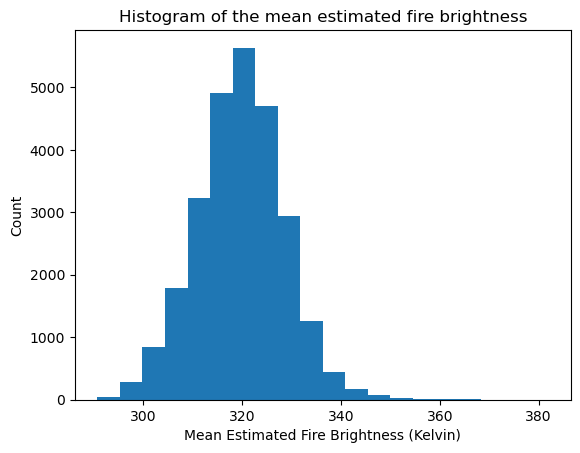

In [19]:
plt.Figure(figsize=(12,6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of the mean estimated fire brightness')
plt.show()

TASK 1.7 Use the functionality of seaborn and pass region as hue, to understand the distribution of estimated fire brightness across regions

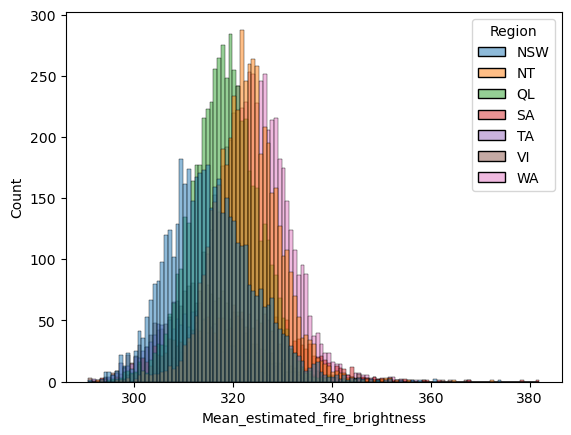

In [20]:
sns.histplot(data=df, x=df['Mean_estimated_fire_brightness'], hue='Region')
plt.show()

refine the plot

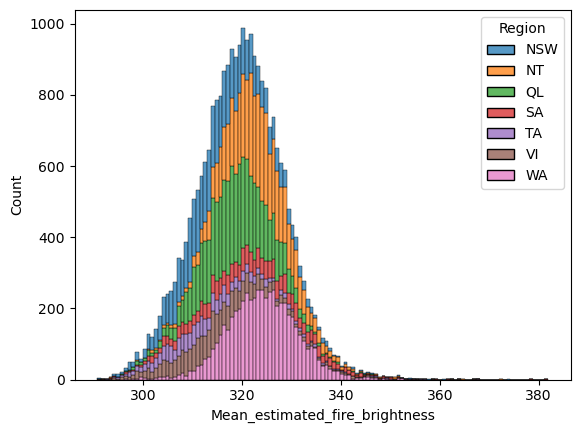

In [21]:
sns.histplot(data=df, x=df['Mean_estimated_fire_brightness'], hue='Region', multiple='stack')
plt.show()

TASK 1.8 Develop a scatter plot to find the correlation between mean estimated fire radiative power and mean confidence level

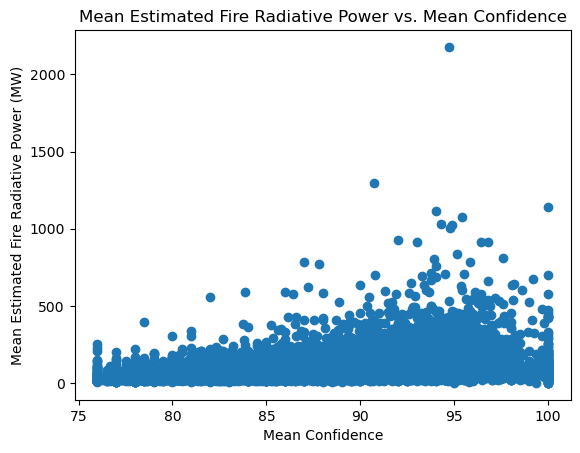

In [22]:

plt.Figure(figsize=(15,7))
plt.scatter(x=df['Mean_confidence'],y=df['Mean_estimated_fire_radiative_power'],color=None)
plt.xlabel('Mean Confidence')
plt.ylabel('Mean Estimated Fire Radiative Power (MW)')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()


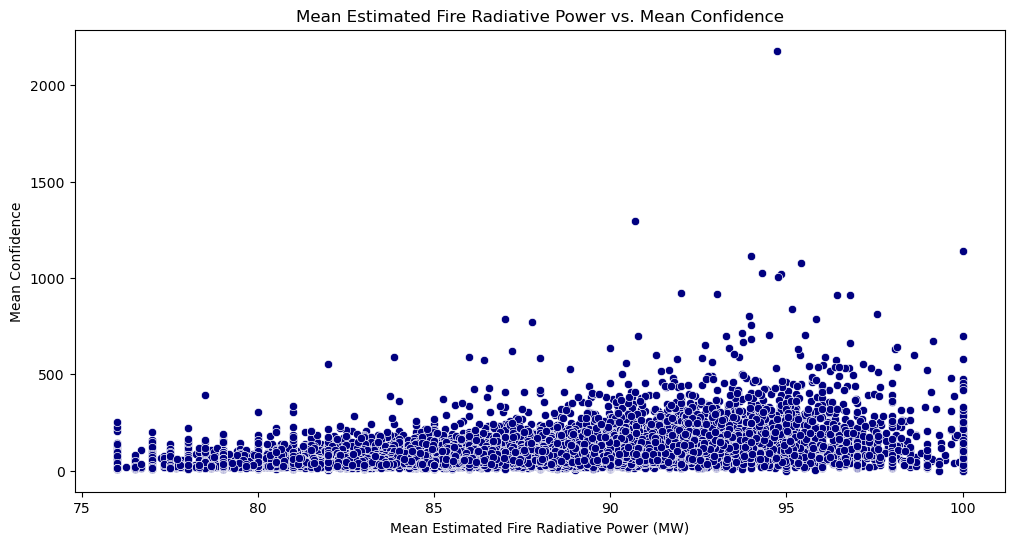

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power', color='navy')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

TASK 1.9 Mark all seven regions affected by wildfires, on the Map of Australia using Folium

In [24]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [25]:
Map_AUS = folium.Map(location=[-25,135], zoom_start = 4)
Map_AUS

In [26]:
# Aus_lat = -25
# Aus_lng = 135

Aus_map = folium.Map(location=[-25,135], zoom_start = 4)

Aus_reg = folium.map.FeatureGroup()

for lat,lng,lab in zip(reg.Lat,reg.Lon, reg.region):
    Aus_reg.add_child(folium.features.CircleMarker(
        [lat,lng],
        raduis=5,
        color = 'yellow',
        fill = True,
        fill_color = 'Blue',
        fill_opacity = 0.6,
        popup = lab
    )
                     )
Aus_map.add_child(Aus_reg)
